In [2]:
from sympy import *

## Constant Power Case

In [3]:
# states constant P
V_rL = symbols('V_rL')
V_iL = symbols('V_iL')
var = [V_rL, V_iL]

In [4]:
# params constant P
P = symbols('P')
Q = symbols('Q')
I_R = symbols('I_R')
I_I = symbols('I_I')

In [5]:
eqs = [
    V_rL*I_R + V_iL*I_I - P,
    V_iL*I_R - V_rL*I_I - Q
]

In [6]:
# Load Voltage Solution
nonlinsolve(eqs, var)

FiniteSet((-(I_I*Q - I_R*P)/(I_I**2 + I_R**2), (I_I*P + I_R*Q)/(I_I**2 + I_R**2)))

## Constant Power + Resistor (no Reactive Power)

In [7]:
# states
I_r1 = symbols('I_r1')
I_i1 = symbols('I_i1')
I_r2 = symbols('I_r2')
I_i2 = symbols('I_i2')
var2 = [V_rL, V_iL, I_r1, I_i1, I_r2, I_i2]

In [8]:
# params
R_L = symbols('R_L')
X = symbols('X')
V_r1 = symbols('V_r1')
V_i1 = symbols('V_i1')

In [9]:
# Params
eqs2 = [
    V_rL*I_r1 + V_iL*I_i1 - P,
    V_iL*I_r1 - V_rL*I_i1 - 0,
    I_r2 - V_rL / R_L,
    I_i2 - V_iL / R_L,
    I_R - I_r1 - I_r2,
    I_I - I_i1 - I_i2,    
]

In [10]:
aux = nonlinsolve(eqs2, var2)

In [12]:
# Solution of Load Voltage + Current flowing through CPL and Resistor
aux

FiniteSet((I_R*(I_I**2*R_L + I_R**2*R_L + sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2)), I_I*(I_I**2*R_L + I_R**2*R_L + sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2)), I_R*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*R_L*(I_I**2 + I_R**2)), I_I*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*R_L*(I_I**2 + I_R**2)), I_R*(I_I**2*R_L + I_R**2*R_L + sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*R_L*(I_I**2 + I_R**2)), I_I/2 + I_I*sqrt(R_L*(I_I**2 + I_R**2)*(I_I**2*R_L + I_R**2*R_L - 4*P))/(2*R_L*(I_I**2 + I_R**2))), (I_R*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2)), I_I*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I

In [13]:
# Solution 1: Real Voltage
Vr_expr1 = aux.args[1][0]
Vr_expr1

I_R*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2))

In [14]:
# Solution 1: Imaginary Voltage
Vi_expr1 = aux.args[1][1]
Vi_expr1

I_I*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2))

In [15]:
# Solution 2: Real Voltage
Vr_expr2 = aux.args[0][0]
Vr_expr2

I_R*(I_I**2*R_L + I_R**2*R_L + sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2))

In [16]:
# Solution 2: Imaginary Voltage
Vi_expr2 = aux.args[0][1]
Vi_expr2

I_I*(I_I**2*R_L + I_R**2*R_L + sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2))

### Jacobian of Line Current

In [17]:
R = symbols('R')
X = symbols('X')

In [18]:
dIr_dt1 = V_r1 - Vr_expr1 - R * I_R + X*I_I
dIi_dt1 = V_i1 - Vi_expr1 - R * I_I - X*I_R
dIr_dt2 = V_r1 - Vr_expr2 - R * I_R + X*I_I
dIi_dt2 = V_i1 - Vi_expr2 - R * I_I - X*I_R

In [19]:
A11 = diff(dIr_dt1, I_R)
A12 = diff(dIr_dt1, I_I)
A21 = diff(dIi_dt1, I_R)
A22 = diff(dIi_dt1, I_I)

In [20]:
A11

I_R**2*(I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(I_I**2 + I_R**2)**2 - I_R*(2*I_R*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P))*(4*I_I**2*I_R*R_L + 4*I_R**3*R_L - 8*I_R*P)/(2*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2)) - R - (I_I**2*R_L + I_R**2*R_L - sqrt(R_L*(I_I**4*R_L + 2*I_I**2*I_R**2*R_L - 4*I_I**2*P + I_R**4*R_L - 4*I_R**2*P)))/(2*(I_I**2 + I_R**2))

Complicated expresions do not yield simple analyses to characterize stability

# Paper Example Case

In [21]:
from scipy.optimize import fsolve
from numpy import linspace, savetxt
from numpy import real

In [23]:
# Define Variables
varx = [I_R, I_I, V_rL, V_iL, I_r1, I_i1, I_r2, I_i2]

In [25]:
# Construct parameters eta to sweep Eigenvalues
eta = linspace(0.02, 0.98, num=70)
eta_precision = linspace(eta[34],eta[35], num=50)
eta_final = [*eta[0:34], *eta_precision, *eta[36:]]
eta = eta_final

In [27]:
# Equations
eqs3 = [
    V_r1 - V_rL - R * I_R + X*I_I,
    V_i1 - V_iL - R * I_I - X*I_R,
    V_rL*I_r1 + V_iL*I_i1 - P,
    V_iL*I_r1 - V_rL*I_i1 - Q,
    I_r2 - V_rL / R_L,
    I_i2 - V_iL / R_L,
    I_R - I_r1 - I_r2,
    I_I - I_i1 - I_i2,    
]

Construct Jacobian of Algebraic and Differential Parts

In [30]:
F = Matrix(eqs3)

In [31]:
F = Matrix(eqs3)
FJac = F.jacobian(varx)
FJac

Matrix([
[-R,  X,     -1,      0,    0,     0,  0,  0],
[-X, -R,      0,     -1,    0,     0,  0,  0],
[ 0,  0,   I_r1,   I_i1, V_rL,  V_iL,  0,  0],
[ 0,  0,  -I_i1,   I_r1, V_iL, -V_rL,  0,  0],
[ 0,  0, -1/R_L,      0,    0,     0,  1,  0],
[ 0,  0,      0, -1/R_L,    0,     0,  0,  1],
[ 1,  0,      0,      0,   -1,     0, -1,  0],
[ 0,  1,      0,      0,    0,    -1,  0, -1]])

In [32]:
fx = FJac[0:2,0:2]
fy = FJac[0:2, 2:8]
gx = FJac[2:8, 0:2]
gy = FJac[2:8, 2:8]

In [33]:
aux = gy.det()

In [35]:
# Determinant of gy: |I_CPL|^2 - |I_RL|^2
aux

(I_i1**2*R_L**2 + I_r1**2*R_L**2 - V_iL**2 - V_rL**2)/R_L**2

In [37]:
# Replace Parameters
R = 0.01
X = 0.1
V_r1 = 1.0
V_i1 = 0.0
P = 0.5
Q = 0.05

In [38]:
def pflow(x):
    I_R = x[0]
    I_I = x[1]
    V_rL = x[2]
    V_iL = x[3]
    return [V_r1 - V_rL - R * I_R + X*I_I,
            V_i1 - V_iL - R * I_I - X*I_R,
            V_rL*I_R + V_iL*I_I - 1,
            V_iL*I_R - V_rL*I_I - 0]

In [40]:
# Solve Power Flow without R_L and CPL = 1 pu
x = fsolve(pflow, [1.0, 0.0, 1.0, 0.0])
V0 = sqrt(x[2]**2 + x[3]**2)
V0

0.984674135098140

In [42]:
# Sweep through eta to vary proportion of CPL and R_L
Vmag = []
eigs = []
P_cpl = []
R_list = []
gy_dets = []
for k in eta:
    P = 1.0*k
    Q = 0.0
    R_L = (V0**2)/(1-P)
    eqs3 = [
        V_r1 - V_rL - R * I_R + X*I_I,
        V_i1 - V_iL - R * I_I - X*I_R,
        V_rL*I_r1 + V_iL*I_i1 - P,
        V_iL*I_r1 - V_rL*I_i1 - Q,
        I_r2 - V_rL / R_L,
        I_i2 - V_iL / R_L,
        I_R - I_r1 - I_r2,
        I_I - I_i1 - I_i2,    
    ]
    F = Matrix(eqs3)
    FJac = F.jacobian(varx)
    fx = FJac[0:2,0:2]
    fy = FJac[0:2, 2:8]
    gx = FJac[2:8, 0:2]
    gy = FJac[2:8, 2:8]
    def f(x):
        I_R = x[0]
        I_I = x[1]
        V_rL = x[2]
        V_iL = x[3]
        I_r1 = x[4]
        I_i1 = x[5]
        I_r2 = x[6]
        I_i2 = x[7]
        return [V_r1 - V_rL - R * I_R + X*I_I,
                V_i1 - V_iL - R * I_I - X*I_R,
                V_rL*I_r1 + V_iL*I_i1 - P,
                V_iL*I_r1 - V_rL*I_i1 - Q,
                I_r2 - V_rL / R_L,
                I_i2 - V_iL / R_L,
                I_R - I_r1 - I_r2,
                I_I - I_i1 - I_i2]
    x0 = [1.0, 0.1,1.0,-0.1,0.5,-0.05,0.5,-0.05]
    x = fsolve(f, x0)
    I_R1 = x[0]
    I_I1 = x[1]
    V_rL1 = x[2]
    V_iL1 = x[3]
    I_r11 = x[4]
    I_i11 = x[5]
    I_r21 = x[6]
    I_i21 = x[7]
    Vabs = sqrt(V_rL1**2+V_iL1**2)
    Vmag.append(Vabs)
    R_list.append(R_L)
    P_cpl.append(P)
    gy_eval = gy.evalf(subs={I_r1: I_r11, I_i1:I_i11, V_rL: V_rL1, V_iL: V_iL1})
    gy_dets.append(gy_eval.det())
    print(k)
    Jred = fx - fy @ gy_eval.inv() @ gx
    eigvals = []
    for k in Jred.eigenvals():
        eigvals.append(k)
    eigs.append(eigvals)    

0.02
0.033913043478260865
0.04782608695652174
0.0617391304347826
0.07565217391304348
0.08956521739130434
0.10347826086956521
0.11739130434782609
0.13130434782608694
0.1452173913043478
0.15913043478260866
0.17304347826086955
0.1869565217391304
0.20086956521739127
0.21478260869565216
0.22869565217391302
0.24260869565217388
0.25652173913043474
0.27043478260869563
0.2843478260869565
0.29826086956521736
0.31217391304347825
0.32608695652173914
0.33999999999999997
0.35391304347826086
0.36782608695652175
0.3817391304347826
0.39565217391304347
0.40956521739130436
0.4234782608695652
0.4373913043478261
0.4513043478260869
0.4652173913043478
0.4791304347826087
0.4930434782608695
0.49332741792369117
0.4936113575865128
0.49389529724933445
0.49417923691215615
0.4944631765749778
0.49474711623779943
0.4950310559006211
0.4953149955634427
0.49559893522626436
0.49588287488908606
0.4961668145519077
0.49645075421472934
0.496734693877551
0.4970186335403726
0.49730257320319426
0.49758651286601596
0.49787045252

In [186]:
#for (ix, k) in enumerate(P_cpl):
#    print(k + Vmag[ix]**2/R_list[ix])

In [43]:
re_eig1 = []
im_eig1 = []
re_eig2 = []
im_eig2 = []
for (ix,k) in enumerate(eigs):
    #print(ix)
    #print(k)
    re_eig1.append(re(k[0]))
    im_eig1.append(im(k[0]))
    re_eig2.append(re(k[1]))
    im_eig2.append(im(k[1]))
    #print(gy_dets[ix])
    #print(eta[ix])

In [44]:
import matplotlib.pyplot as plt

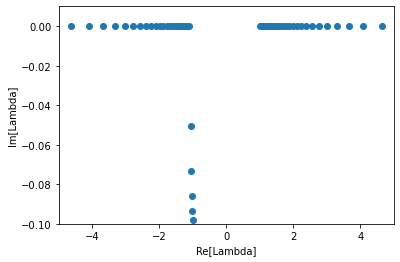

In [47]:
# Plot Eigenvalue 1
plt.scatter(re_eig1, im_eig1)
plt.xlim(-5,5)
plt.ylim(-0.1, 0.01)
plt.xlabel("Re[Lambda]")
plt.ylabel("Im[Lambda]");

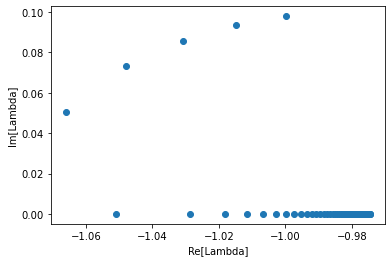

In [48]:
# Plot Eigenvalue 2
plt.scatter(re_eig2, im_eig2)
plt.xlabel("Re[Lambda]")
plt.ylabel("Im[Lambda]");

In [49]:
# Save Eigenvalues
import pandas as pd

In [200]:
df = pd.DataFrame(list(zip(re_eig1, im_eig1)))
df.to_csv('data.csv', index=False)